In [1]:
# Importing Libraries
from sklearn.datasets import load_boston
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Loading Data
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = pd.DataFrame(boston.target)
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [8]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

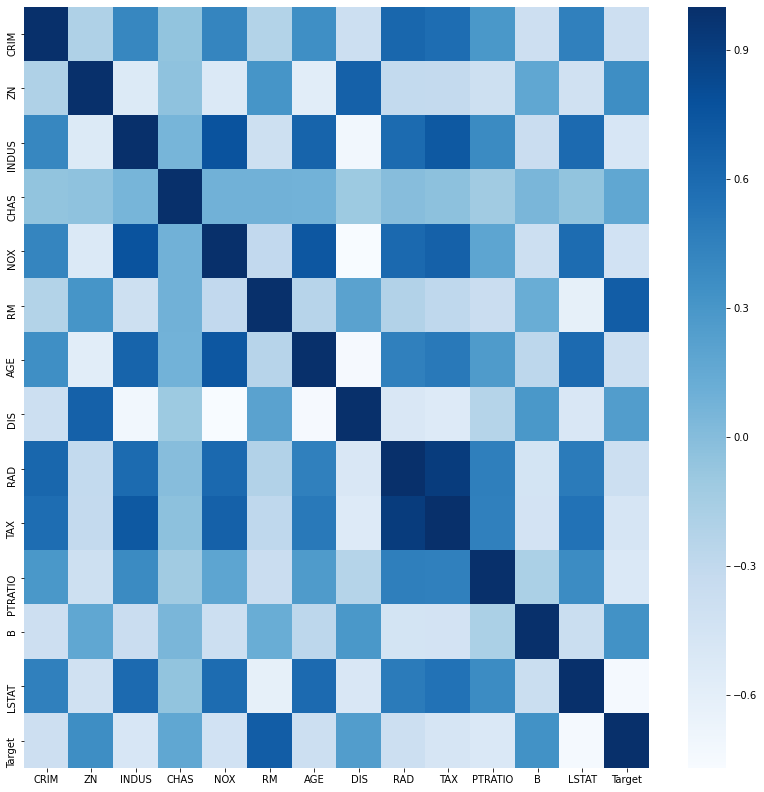

In [12]:
# Exploratory Data Analysis
data = pd.concat([X, Y], axis=1)
data.rename(columns = {0:'Target'}, inplace = True)
fig = plt.figure(figsize = (14, 14)) 
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

In [10]:
# Feature Selection
data.corr()['Target']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Target     1.000000
Name: Target, dtype: float64

In [18]:
X = X[['RM', 'PTRATIO', 'LSTAT']]
print(X.shape)
print(X.describe())

(506, 3)
               RM     PTRATIO       LSTAT
count  506.000000  506.000000  506.000000
mean     6.284634   18.455534   12.653063
std      0.702617    2.164946    7.141062
min      3.561000   12.600000    1.730000
25%      5.885500   17.400000    6.950000
50%      6.208500   19.050000   11.360000
75%      6.623500   20.200000   16.955000
max      8.780000   22.000000   37.970000


In [14]:
X.isnull().sum()

RM         0
PTRATIO    0
LSTAT      0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


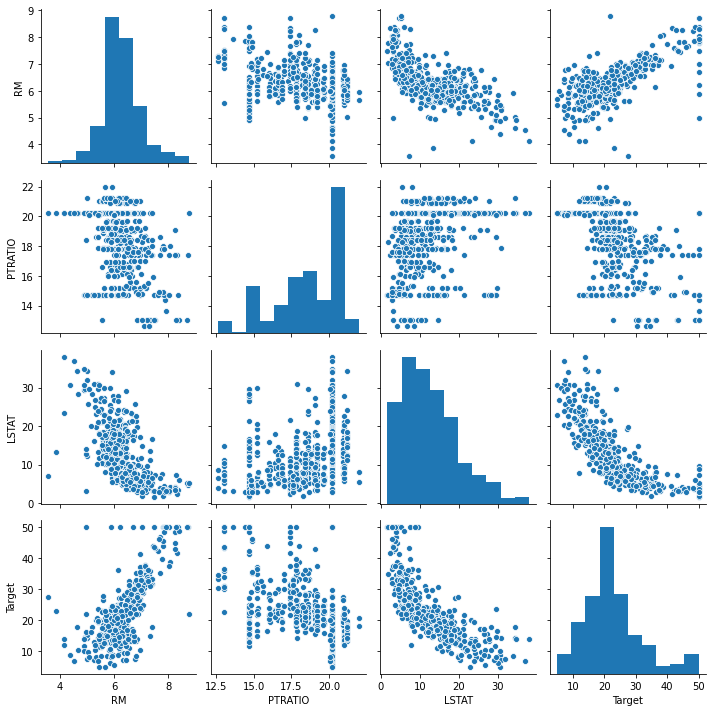

In [19]:
sns.pairplot(data[['RM', 'PTRATIO', 'LSTAT','Target']], size=2.5)
plt.tight_layout()

In [20]:
# Data Preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 3) (404, 1)
(102, 3) (102, 1)


In [24]:
# Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [25]:
# Model Evaluation
print(mean_squared_error(Y_test, Y_pred))

27.114957415580644


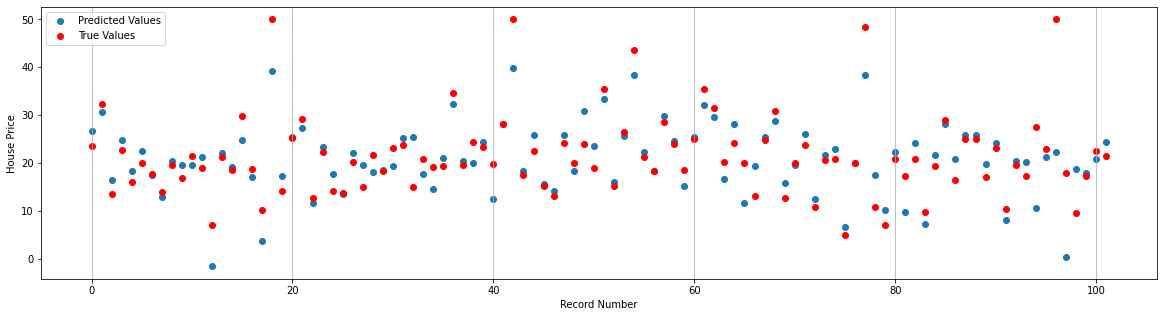

In [26]:
# Visualizing Model Results
fig = plt.figure(figsize = (20, 5)) 
plt.scatter([i for i in range(len(Y_pred))], Y_pred, label='Predicted Values')
plt.scatter([i for i in range(len(Y_test))], Y_test, color='r', label='True Values')
plt.grid(True, which='both', axis='x')
plt.xlabel('Record Number')
plt.ylabel('House Price')
plt.legend()
plt.show()